<h1 align="center">  Intrusion Detection System </h1>  
<h6 align="right" > Mohamed Amine Lahyani </h6>
</br>

In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from statistics import mode
import warnings 
warnings.filterwarnings("ignore")

#### 1.Open the CICIDS2017_sample.CSV

In [21]:
df = pd.read_csv("CICIDS2017_sample_km.csv")
print(df.shape)

(26800, 78)


In [20]:
df.head(5)

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,5.416666e-07,0.0,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.00101,0.0,0.000307,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,5.416666e-07,0.0,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.00101,0.0,0.000307,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,4.416666e-07,0.0,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.00101,0.0,0.000307,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,7.499999e-07,0.0,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.00101,0.0,0.000307,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,7.249999e-07,0.0,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.00101,0.0,0.000307,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [19]:
df['Label'].value_counts()

0    18225
3     3042
6     2180
1     1966
5     1255
2       96
4       36
Name: Label, dtype: int64

    Chaque label correspond à un type d'attaque : 
        0 => BENIGN
        1 => Bot
        2 => BruteForce 
        3 => DoS
        4 => Infiltration 
        5 => PortScan 
        6 => WebAttack

#### 2. Divide the instances of the dataset into a part for training and a part for testing with a proportion of 80% and 20%.

In [25]:
X = df.drop(['Label'],axis=1)

In [27]:
print(X.shape)

(26800, 77)


In [29]:
y = df["Label"]

In [33]:
print(y.shape)

(26800,)


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, test_size=0.2, random_state=1)

In [39]:
print("les dimensions de X_train : ", X_train.shape)
print("les dimensions de X_test : ",X_test.shape)
print("les dimensions de y_train : ",y_train.shape)
print("les dimensions de y_test : ",y_test.shape)

les dimensions de X_train :  (21440, 77)
les dimensions de X_test :  (5360, 77)
les dimensions de y_train :  (21440,)
les dimensions de y_test :  (5360,)


#### 3. Use SMOTE to balance unbalanced classes with a sampling strategy equal to {2:1000, 4:1000}.

In [52]:
y_train.value_counts()

0    14542
3     2450
6     1761
1     1607
5      986
2       66
4       28
Name: Label, dtype: int64

In [58]:
from imblearn.over_sampling import SMOTE

In [60]:
smote = SMOTE(n_jobs=-1,sampling_strategy={2:1000, 4:1000})

In [63]:
X_train, y_train = smote.fit_resample(X_train, y_train)

In [66]:
y_train.value_counts()

0    14542
3     2450
6     1761
1     1607
4     1000
2     1000
5      986
Name: Label, dtype: int64

## Part 1: implementation of the first classifier

#### 4. Briefly describe how the OneVsOne classifier works.

       OneVsOneClassifier builds a classifier per pair of classes. At prediction time, the class that received the most
       votes is selected. In case of a tie (between two classes with an equal number of votes), it selects the class with 
       the highest aggregate classification confidence by summing the confidence levels pairwise classification calculated 
       by the underlying binary classifiers.

#### 5.Train the model using the first classifier by passing the training data.

In [71]:
from sklearn import datasets
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC

In [126]:
OvsO = OneVsOneClassifier(LinearSVC(random_state=0))
OvsO.fit(X_train, y_train)

OneVsOneClassifier(estimator=LinearSVC(random_state=0))

#### 6. Make the prediction (test) using the first classifier by passing the test data.

In [129]:
y_pred1 = OvsO.predict(X_test)
y_pred1

array([0, 6, 0, ..., 0, 1, 0], dtype=int64)

#### 7. Make the prediction (test) using the first classifier by passing the test data.

In [130]:
%%time
OvsO.fit(X_train, y_train)
y_pred1 = OvsO.predict(X_test)

CPU times: total: 2.53 s
Wall time: 2.54 s


#### 8. Give the statistics given by the classifier (accuracy, precision, recall and f1-score) and interpret the results.

In [131]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      3683
           1       0.61      0.61      0.61       359
           2       0.73      0.53      0.62        30
           3       0.95      0.67      0.79       592
           4       0.50      0.38      0.43         8
           5       0.77      0.68      0.72       269
           6       0.93      0.87      0.90       419

    accuracy                           0.88      5360
   macro avg       0.77      0.67      0.71      5360
weighted avg       0.88      0.88      0.87      5360



#### 9. Give the detailed precision for each attack class (Detailed Accuracy By Class, precision, recall and f1-score) and interpret the results.

In [132]:
print("Accuracy of OneVsOne : ", accuracy_score(y_test, y_pred1))
print("Precision of OneVsOne : ", precision_score(y_test, y_pred1, average=None))
print("Recall of OneVsOne : ", recall_score(y_test, y_pred1, average=None))
print("F1 score of OneVsOne : ", f1_score(y_test, y_pred1, average=None))

Accuracy of OneVsOne :  0.8779850746268657
Precision of OneVsOne :  [0.89737713 0.60833333 0.72727273 0.95432692 0.5        0.77446809
 0.92639594]
Recall of OneVsOne :  [0.95682867 0.61002786 0.53333333 0.67060811 0.375      0.67657993
 0.87112172]
F1 score of OneVsOne :  [0.9261498  0.60917942 0.61538462 0.78769841 0.42857143 0.72222222
 0.89790898]


#### 10. Give and interpret the results of the confusion matrix given by the classifier (confusion matrix).

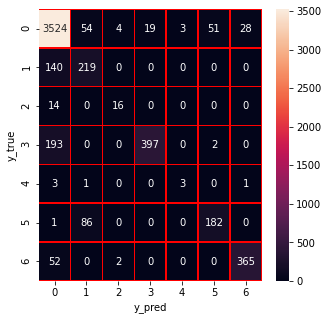

In [143]:
Conf1= confusion_matrix(y_test,y_pred1)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(Conf1, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

## Part 2: implementation of the second classifier: Extra-trees Classifier:

#### 11.Briefly describe how classifier 2 works: Extra-trees Classifier : 

    Extra-trees Classifier differs from traditional decision trees in the way they are constructed. When searching for the best split to separate a node's samples into two groups, random splits are drawn for each of the randomly selected max_features and the best split among these is chosen. When max_features is 1, this amounts to building a completely random decision tree.

#### 12. Train the model using the second classifier by passing the training data.

In [127]:
from sklearn.ensemble import ExtraTreesClassifier

ExtraTreesClassifier()

In [128]:
extra_tree_forest = ExtraTreesClassifier()
extra_tree_forest.fit(X_train, y_train)

ExtraTreesClassifier()

#### 13. Make the prediction using the second classifier by passing the test data.

In [135]:
y_pred2 = extra_tree_forest.predict(X_test)
y_pred2

array([6, 6, 0, ..., 3, 1, 0], dtype=int64)

#### 14. Give the time taken by the second classifier to build the model.

In [137]:
%%time
extra_tree_forest.fit(X_train, y_train)
y_pred2 = extra_tree_forest.predict(X_test)

CPU times: total: 1.97 s
Wall time: 1.97 s


#### 15.Give the statistics given by the classifier (accuracy, precision, recall and f1-score) and interpret the results.

In [138]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3683
           1       0.96      0.97      0.97       359
           2       0.97      0.97      0.97        30
           3       0.98      0.99      0.99       592
           4       1.00      0.38      0.55         8
           5       1.00      0.97      0.98       269
           6       0.99      0.98      0.98       419

    accuracy                           0.99      5360
   macro avg       0.98      0.89      0.92      5360
weighted avg       0.99      0.99      0.99      5360



#### 16. Give the detailed precision for each attack class (Detailed Accuracy By Class, precision, recall and f1-score) and interpret the results.

In [139]:
print("Accuracy of Extra-trees Classifier : ", accuracy_score(y_test, y_pred2))
print("Precision of Extra-trees Classifier : ", precision_score(y_test, y_pred2, average=None))
print("Recall of Extra-trees Classifier : ", recall_score(y_test, y_pred2, average=None))
print("F1 score of Extra-trees Classifier : ", f1_score(y_test, y_pred2, average=None))

Accuracy of Extra-trees Classifier :  0.9871268656716418
Precision of Extra-trees Classifier :  [0.98917163 0.96143251 0.96666667 0.98489933 1.         0.99616858
 0.99031477]
Recall of Extra-trees Classifier :  [0.99212598 0.97214485 0.96666667 0.99155405 0.375      0.96654275
 0.97613365]
F1 score of Extra-trees Classifier :  [0.9906466  0.966759   0.96666667 0.98821549 0.54545455 0.98113208
 0.98317308]


#### 17. Give and interpret the results of the confusion matrix given by the classifier (confusion matrix).

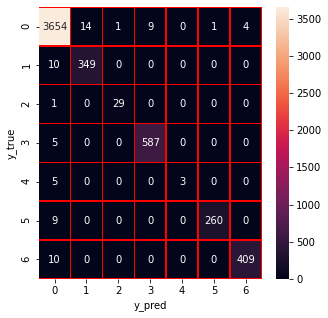

In [142]:
Conf2= confusion_matrix(y_test,y_pred2)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(Conf2, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

## Part 3: comparison of results

#### 18. Compare the results found by the two classifiers in the form of a table? What can we conclude.

In [174]:
OneVsOne_Correct_Predct = []
Extra_Tree_Correct_Predct = []
for i in range(7) : 
    OneVsOne_Correct_Predct.append(Conf1[i,i])
    Extra_Tree_Correct_Predct.append(Conf2[i,i])   

In [175]:
for i in range (7) : 
    print("Le nombre de classe ",i," prédite correctement par OneVsOne : ",OneVsOne_Correct_Predct[i])
    print("Le nombre de classe ",i," prédite correctement par Extra_Tree : ",Extra_Tree_Correct_Predct[i])
    print()

Le nombre de classe  0  prédite correctement par OneVsOne :  3524
Le nombre de classe  0  prédite correctement par Extra_Tree :  3654

Le nombre de classe  1  prédite correctement par OneVsOne :  219
Le nombre de classe  1  prédite correctement par Extra_Tree :  349

Le nombre de classe  2  prédite correctement par OneVsOne :  16
Le nombre de classe  2  prédite correctement par Extra_Tree :  29

Le nombre de classe  3  prédite correctement par OneVsOne :  397
Le nombre de classe  3  prédite correctement par Extra_Tree :  587

Le nombre de classe  4  prédite correctement par OneVsOne :  3
Le nombre de classe  4  prédite correctement par Extra_Tree :  3

Le nombre de classe  5  prédite correctement par OneVsOne :  182
Le nombre de classe  5  prédite correctement par Extra_Tree :  260

Le nombre de classe  6  prédite correctement par OneVsOne :  365
Le nombre de classe  6  prédite correctement par Extra_Tree :  409



In [178]:
OneVsOne_Correct_Predct_sum=0
Extra_Tree_Correct_Predct_sum=0
for i in range (7) : 
    OneVsOne_Correct_Predct_sum = OneVsOne_Correct_Predct_sum + OneVsOne_Correct_Predct[i]
    Extra_Tree_Correct_Predct_sum = Extra_Tree_Correct_Predct_sum + Extra_Tree_Correct_Predct[i]

print("Le nombre totale de classe prédite correctement par OneVsOne Classifier : ",OneVsOne_Correct_Predct_sum)
print("Le nombre totale de classe prédite correctement par Extra_Tree_Classifier : ",Extra_Tree_Correct_Predct_sum)

Le nombre totale de classe prédite correctement par OneVsOne Classifier :  4706
Le nombre totale de classe prédite correctement par Extra_Tree_Classifier :  5291


    We can conclude that for all classes, the Extre_Tree_Classifier gave better results than the OneVsOne Classify.